In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Praveen/directory/shoes price/product_data.csv")
data.head()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,1,58.90,13.29,1,1,2,72.19
1,1,239.90,19.93,1,1,3,259.83
2,1,199.00,17.87,1,1,5,216.87
3,1,12.99,12.79,1,1,2,25.78
4,1,199.90,18.14,1,1,3,218.04


In [3]:
data.describe()

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
count,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000,101335.000000
mean,1.205280,79.818332,16.126716,1.089495,1.352040,2.671703,124.124508
std,0.715244,56.057932,5.943237,0.689100,0.652362,2.524321,124.418064
min,1.000000,0.850000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,35.990000,12.690000,1.000000,1.000000,1.000000,55.550000
50%,1.000000,63.900000,15.470000,1.000000,1.000000,1.000000,95.400000
75%,1.000000,109.900000,18.670000,1.000000,2.000000,3.000000,155.840000
max,21.000000,270.000000,36.000000,26.000000,4.000000,24.000000,3195.730000


In [4]:
data.shape

(101335, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101335 entries, 0 to 101334
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_item_id         101335 non-null  int64  
 1   price                 101335 non-null  float64
 2   freight_value         101335 non-null  float64
 3   payment_sequential    101335 non-null  int64  
 4   payment_type          101335 non-null  int64  
 5   payment_installments  101335 non-null  int64  
 6   payment_value         101335 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 5.4 MB


In [6]:
duplicate = data.duplicated()
print("Number of duplicate rows=%d" %(duplicate.sum()))

Number of duplicate rows=25259


In [7]:
dup = data[data.duplicated()]

In [8]:
dup.head(100)

,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
443,1,99.90,0.00,1,2,1,99.90
665,1,39.90,15.10,1,1,5,55.00
838,1,99.00,13.71,1,1,4,112.71
890,1,49.00,7.78,1,1,2,56.78
913,1,19.90,15.10,1,1,1,35.00
...,...,...,...,...,...,...,...
3649,1,150.00,15.80,1,1,3,165.80
3653,1,30.50,7.78,1,1,1,38.28
3659,1,19.90,15.10,1,1,1,35.00
3668,1,69.90,16.25,1,1,2,86.15


In [9]:
dup.shape

(25259, 7)

In [10]:
df = data.drop_duplicates(keep='first')

In [11]:
df.shape

(76076, 7)

In [12]:
df.drop(df[df['payment_value'] <= 0].index, inplace = True)

In [13]:
df.drop(df[df['payment_installments'] <= 0].index, inplace = True)

In [14]:
df.shape

(76070, 7)

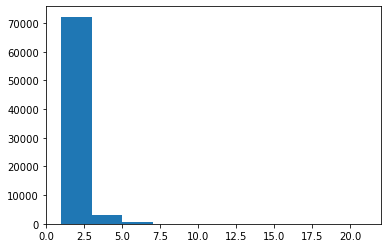

In [15]:
plt.hist((df.order_item_id),bins=10)
plt.show()

<AxesSubplot:xlabel='order_item_id', ylabel='count'>

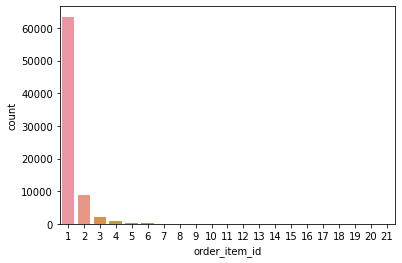

In [16]:
# Countplot for order id
sns.countplot(df["order_item_id"])

<AxesSubplot:xlabel='payment_sequential', ylabel='count'>

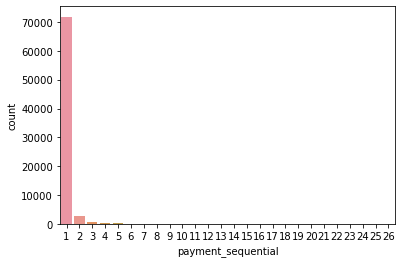

In [17]:
# Countplot for payment sequential
sns.countplot(df["payment_sequential"])

<AxesSubplot:xlabel='payment_type', ylabel='count'>

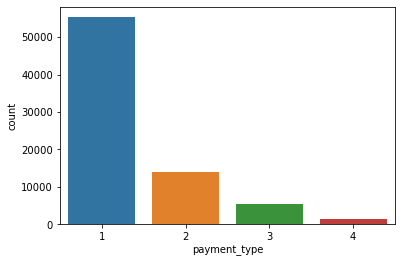

In [18]:
# Countplot for payment type
sns.countplot(df["payment_type"])

<AxesSubplot:xlabel='payment_installments', ylabel='count'>

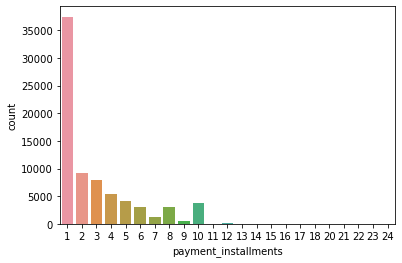

In [19]:
# Countplot for payment installments
sns.countplot(df["payment_installments"])

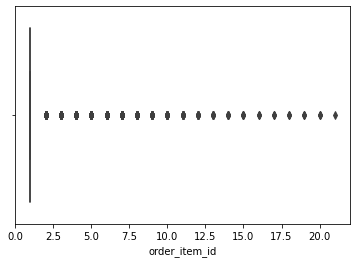

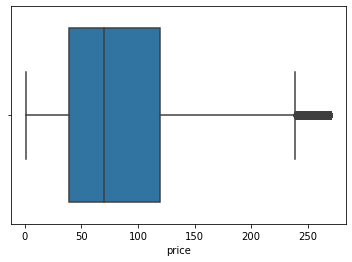

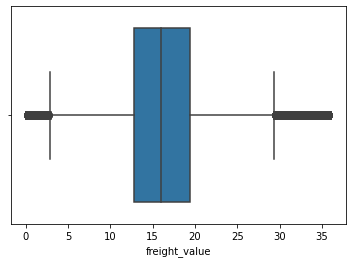

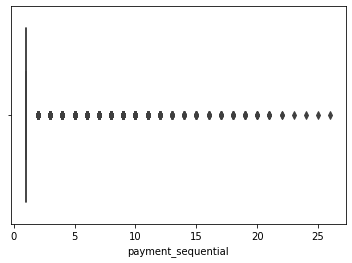

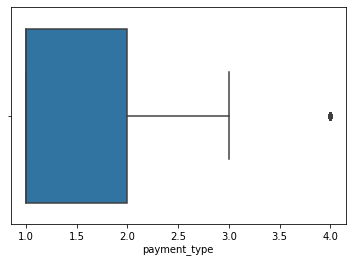

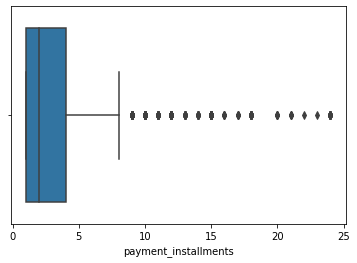

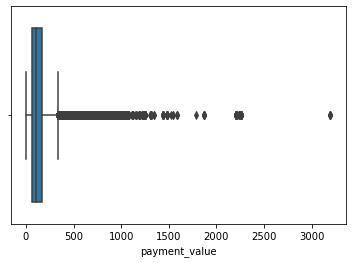

In [20]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [21]:
from scipy.stats import skew

order_item_id
6.696080811198816


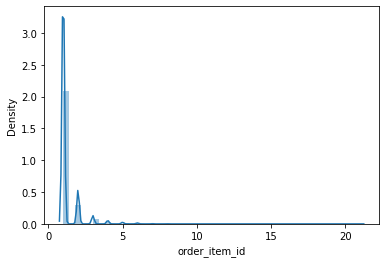

price
0.9718000153149303


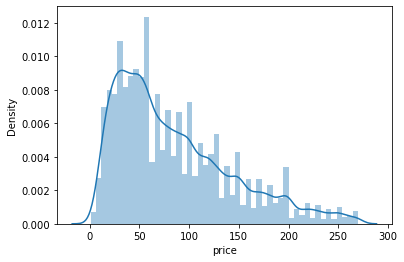

freight_value
0.6108539084707014


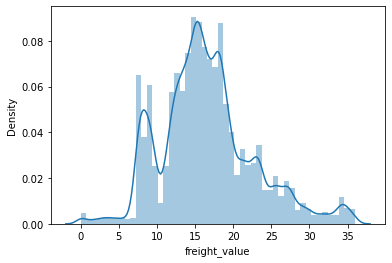

payment_sequential
13.496451461194477


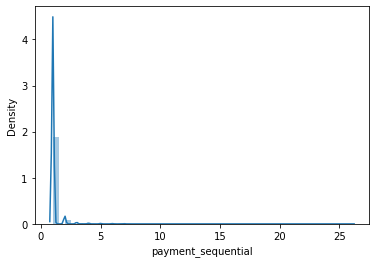

payment_type
1.8636525542782545


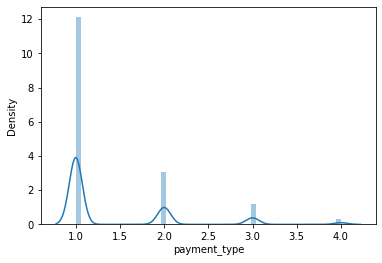

payment_installments
1.6542758206962753


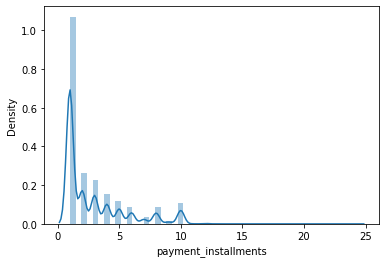

payment_value
5.6522845505428165


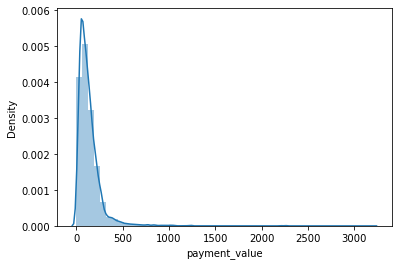

In [22]:
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

Replacing outlier

In [23]:
df1 = df

In [24]:
num_cols = df1[['price','freight_value','payment_value']]
for col in num_cols.columns:
  q1 = num_cols[col].quantile(0.25)
  q3 = num_cols[col].quantile(0.75)
  iqr = q3-q1
  lower = q1 - (1.5*iqr)
  upper = q3 + (1.5*iqr)
  for ind in df1[col].index:
    if df1.loc[ind,col] < lower :
      df1.loc[ind,col] = lower
    elif df1.loc[ind,col] > upper :
      df1.loc[ind,col] = upper

In [25]:
df1['payment_type'] = df1['payment_type'].replace([4],3)

In [26]:
df1['payment_type'].value_counts()

1    55277
2    13996
3     6797
Name: payment_type, dtype: int64

In [27]:
df1["payment_installments"].value_counts()

1     37441
2      9205
3      7935
4      5459
5      4146
10     3751
6      3076
8      3014
7      1249
9       515
12      106
15       53
11       24
18       23
24       19
13       16
14       13
16        6
17        6
20        6
21        5
23        1
22        1
Name: payment_installments, dtype: int64

In [28]:
df1["payment_installments"] = np.where(df1["payment_installments"]> 10, df1["payment_installments"] == 10, df1["payment_installments"])

In [29]:
df1["payment_sequential"].value_counts()

1     71828
2      2837
3       561
4       269
5       153
6       103
7        70
8        48
9        39
10       33
11       28
12       21
13       13
14       10
15        9
16        8
17        8
18        8
19        8
20        5
21        5
22        2
25        1
23        1
24        1
26        1
Name: payment_sequential, dtype: int64

In [30]:
df1["payment_sequential"] = np.where(df1["payment_sequential"]> 5, df1["payment_sequential"] == 5, df1["payment_sequential"])

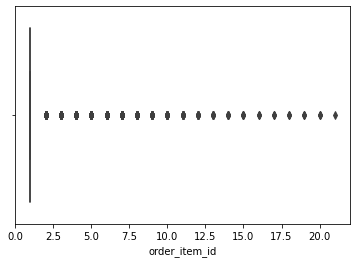

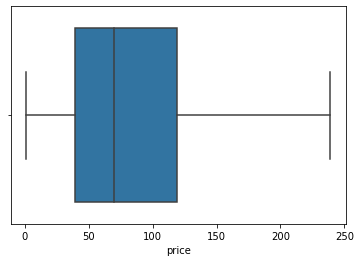

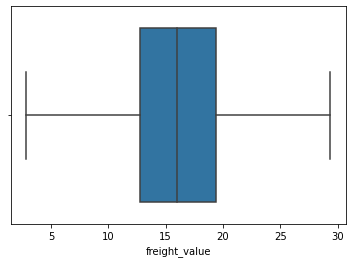

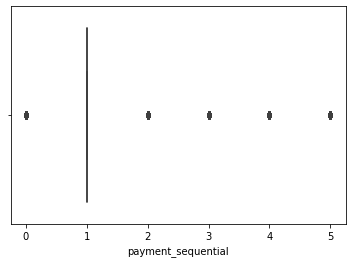

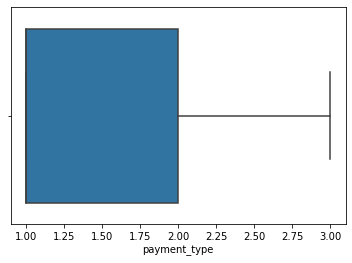

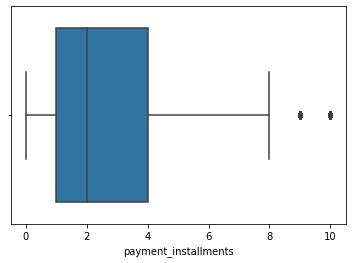

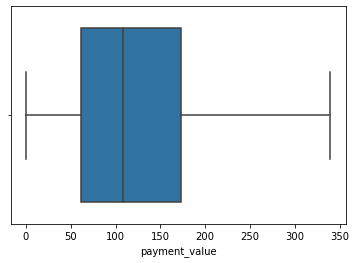

In [31]:
for i in df.columns:
    sns.boxplot(df1[i])
    plt.show()

In [32]:
df1.shape

(76070, 7)

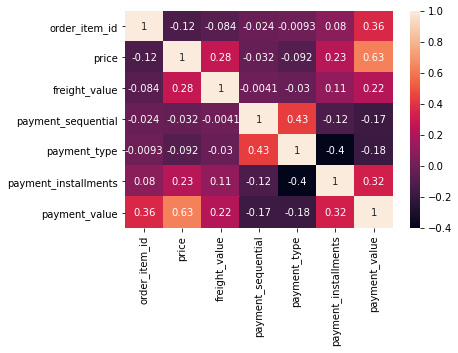

In [33]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [34]:
df2 = df1.drop(columns = ['order_item_id'])

In [35]:
x = df2.drop(columns=['price'])
y = df2['price']

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=10)

In [37]:
from scipy.stats import zscore

xtrain  = xtrain.apply(zscore)
xtest = xtest.apply(zscore)

In [38]:
x = x.apply(zscore)

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score,KFold


In [40]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
from sklearn.linear_model import LinearRegression
k  = KFold(n_splits=5,shuffle=True, random_state=10)

lin_reg=LinearRegression()
lin_reg.fit(xtrain,ytrain)

print('Training score of Linear Regression model is ',lin_reg.score(xtrain, ytrain))
print('Training score of Linear Regression model is ',lin_reg.score(xtest, ytest))
lin_reg_R2_score = cross_val_score(lin_reg,x,y,cv=k,scoring='r2').mean()
lin_reg_R2_score

y_pred = lin_reg.predict(xtest)
acc_DT=metrics.r2_score(ytest, y_pred)
print('Accuracy DT: ',acc_DT)

results = pd.DataFrame({'Method':['Linear'], 'accuracy': acc_DT},index={'0'})
results = results[['Method', 'accuracy']]
results

Training score of Linear Regression model is  0.42822377814615675
Training score of Linear Regression model is  0.42700713016611025
Accuracy DT:  0.42700713016611025


,Method,accuracy
0,Linear,0.427007


In [43]:
dec_tree2 = DecisionTreeRegressor(criterion = 'mse', max_depth = 10, random_state=18)
dec_tree2=dec_tree2.fit(xtrain, ytrain)

print('Training score of Regularized Decision Tree ',dec_tree2.score(xtrain, ytrain))
print('Test score of Regularized Decision Tree ',dec_tree2.score(xtest, ytest))

y_pred = dec_tree2.predict(xtest)
acc_DT=metrics.r2_score(ytest, y_pred)
print('Accuracy DT: ',acc_DT)

results = pd.DataFrame({'Method':['regularized Decision'], 'accuracy': acc_DT},index={'0'})
results = results[['Method', 'accuracy']]
results

Training score of Regularized Decision Tree  0.6153309453158119
Test score of Regularized Decision Tree  0.5579950459326011
Accuracy DT:  0.5579950459326011


,Method,accuracy
0,regularized Decision,0.557995


In [44]:
dt_model = DecisionTreeRegressor()
dt_model.fit(xtrain , ytrain)

DecisionTreeRegressor()

In [45]:
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=xtrain.columns))

Feature importances: 
                            Imp
freight_value         0.259794
payment_sequential    0.014094
payment_type          0.010379
payment_installments  0.032820
payment_value         0.682913


In [46]:
y_pred = dt_model.predict(xtest)
# performance on train data
print('Performance on training data using DT:',dt_model.score(xtrain,ytrain))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(xtest,ytest))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(ytest, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(ytest, y_pred))

Performance on training data using DT: 0.9922813366574752
Performance on testing data using DT: 0.49040031067363987
Accuracy DT:  0.49040031067363987
MSE:  1705.882679908009


In [47]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.4904


In [48]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,x, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.41471543523334853
Standard Deviation:  0.06795029682581753


In [49]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.490400
2,Decision Tree k fold,0.414715


In [50]:
model=RandomForestRegressor()
model.fit(xtrain, ytrain)

RandomForestRegressor()

In [51]:
y_pred = model.predict(xtest)
# performance on train data
print('Performance on training data using RFR:',model.score(xtrain,ytrain))
# performance on test data
print('Performance on testing data using RFR:',model.score(xtest,ytest))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(ytest, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(ytest, y_pred))

Performance on training data using RFR: 0.9655799467163871
Performance on testing data using RFR: 0.7200180529592
Accuracy DT:  0.7200180529592
MSE:  937.2383149903077


In [52]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.490400
2,Decision Tree k fold,0.414715
3,Random Forest Regressor,0.720018


In [53]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,x, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6226706928529401
Standard Deviation:  0.044601934948974596


In [54]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

,Method,accuracy
1,Decision Tree,0.490400
2,Decision Tree k fold,0.414715
3,Random Forest Regressor,0.720018
4,Random Forest Regressor k fold,0.622671
